In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE #oversampling
from wordcloud import WordCloud #visualisasikata

### Load Data

In [4]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
5,5.0,116.0,74.0,0.0,NaN,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,NaN,0.248,26.0,1
7,10.0,115.0,NaN,0.0,0.0,35.3,NaN,29.0,0
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


### Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [7]:
(df.isna().sum()/len(df)) * 100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [8]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Count outliers in each numerical column
outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    outlier_counts[col] = count_outliers_iqr(df[col])
    
# Convert the results into a DataFrame for easier viewing
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

#Display the outlier counts DataFrame
outlier_counts_df

,Column,Outlier Count
0,Pregnancies,74
1,Glucose,88
2,BloodPressure,83
3,SkinThickness,13
4,Insulin,80
5,BMI,68
6,DiabetesPedigreeFunction,87
7,Age,74
8,Outcome,0


In [10]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

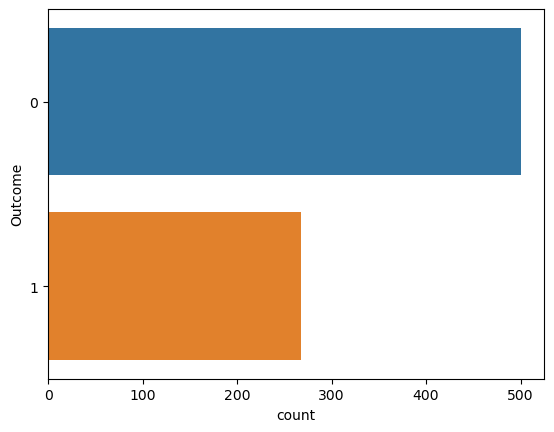

In [17]:
sns.countplot(data=df, y="Outcome")

### EDA

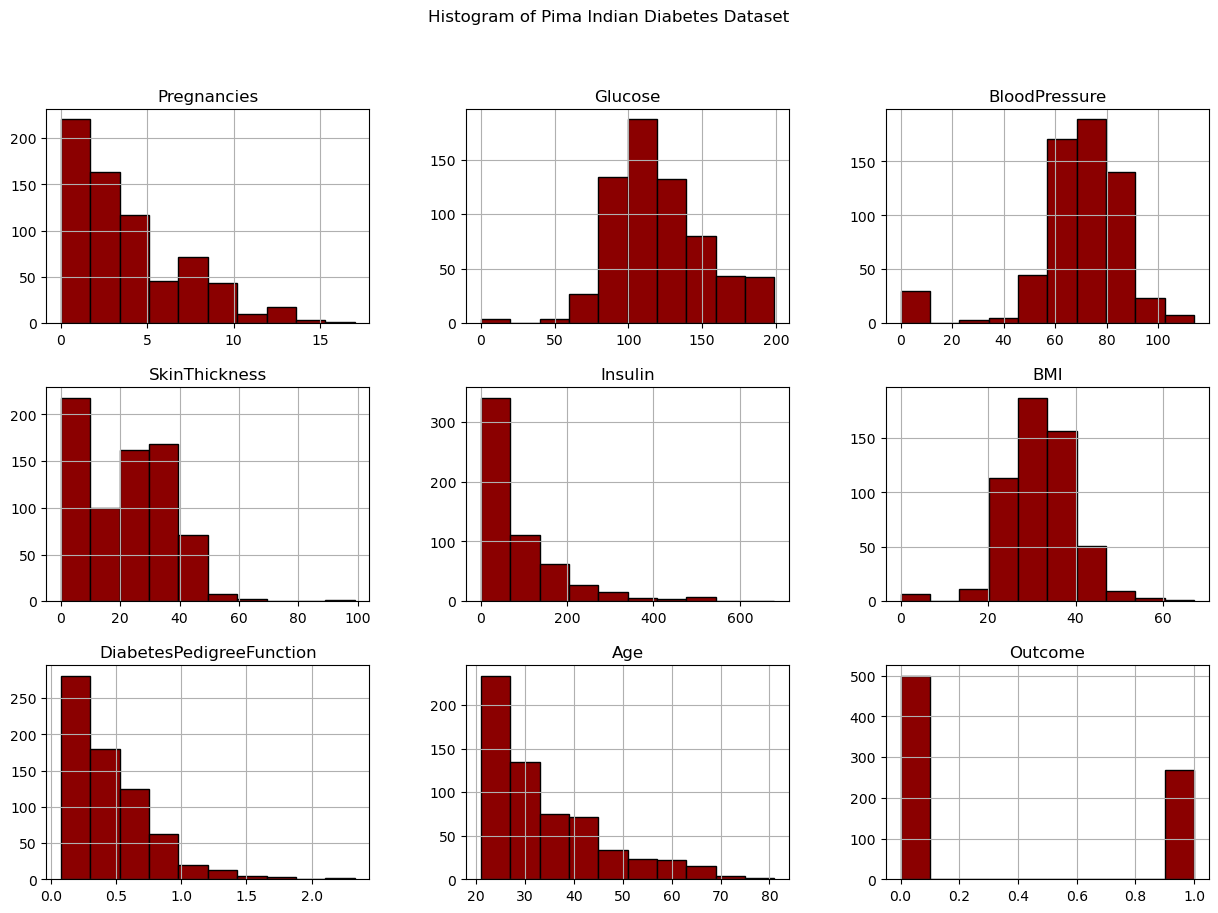

In [9]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(3,3), color='darkred', edgecolor='black')
    plt.suptitle("Histogram of Pima Indian Diabetes Dataset")
    plt.show()

plot_histograms(df)

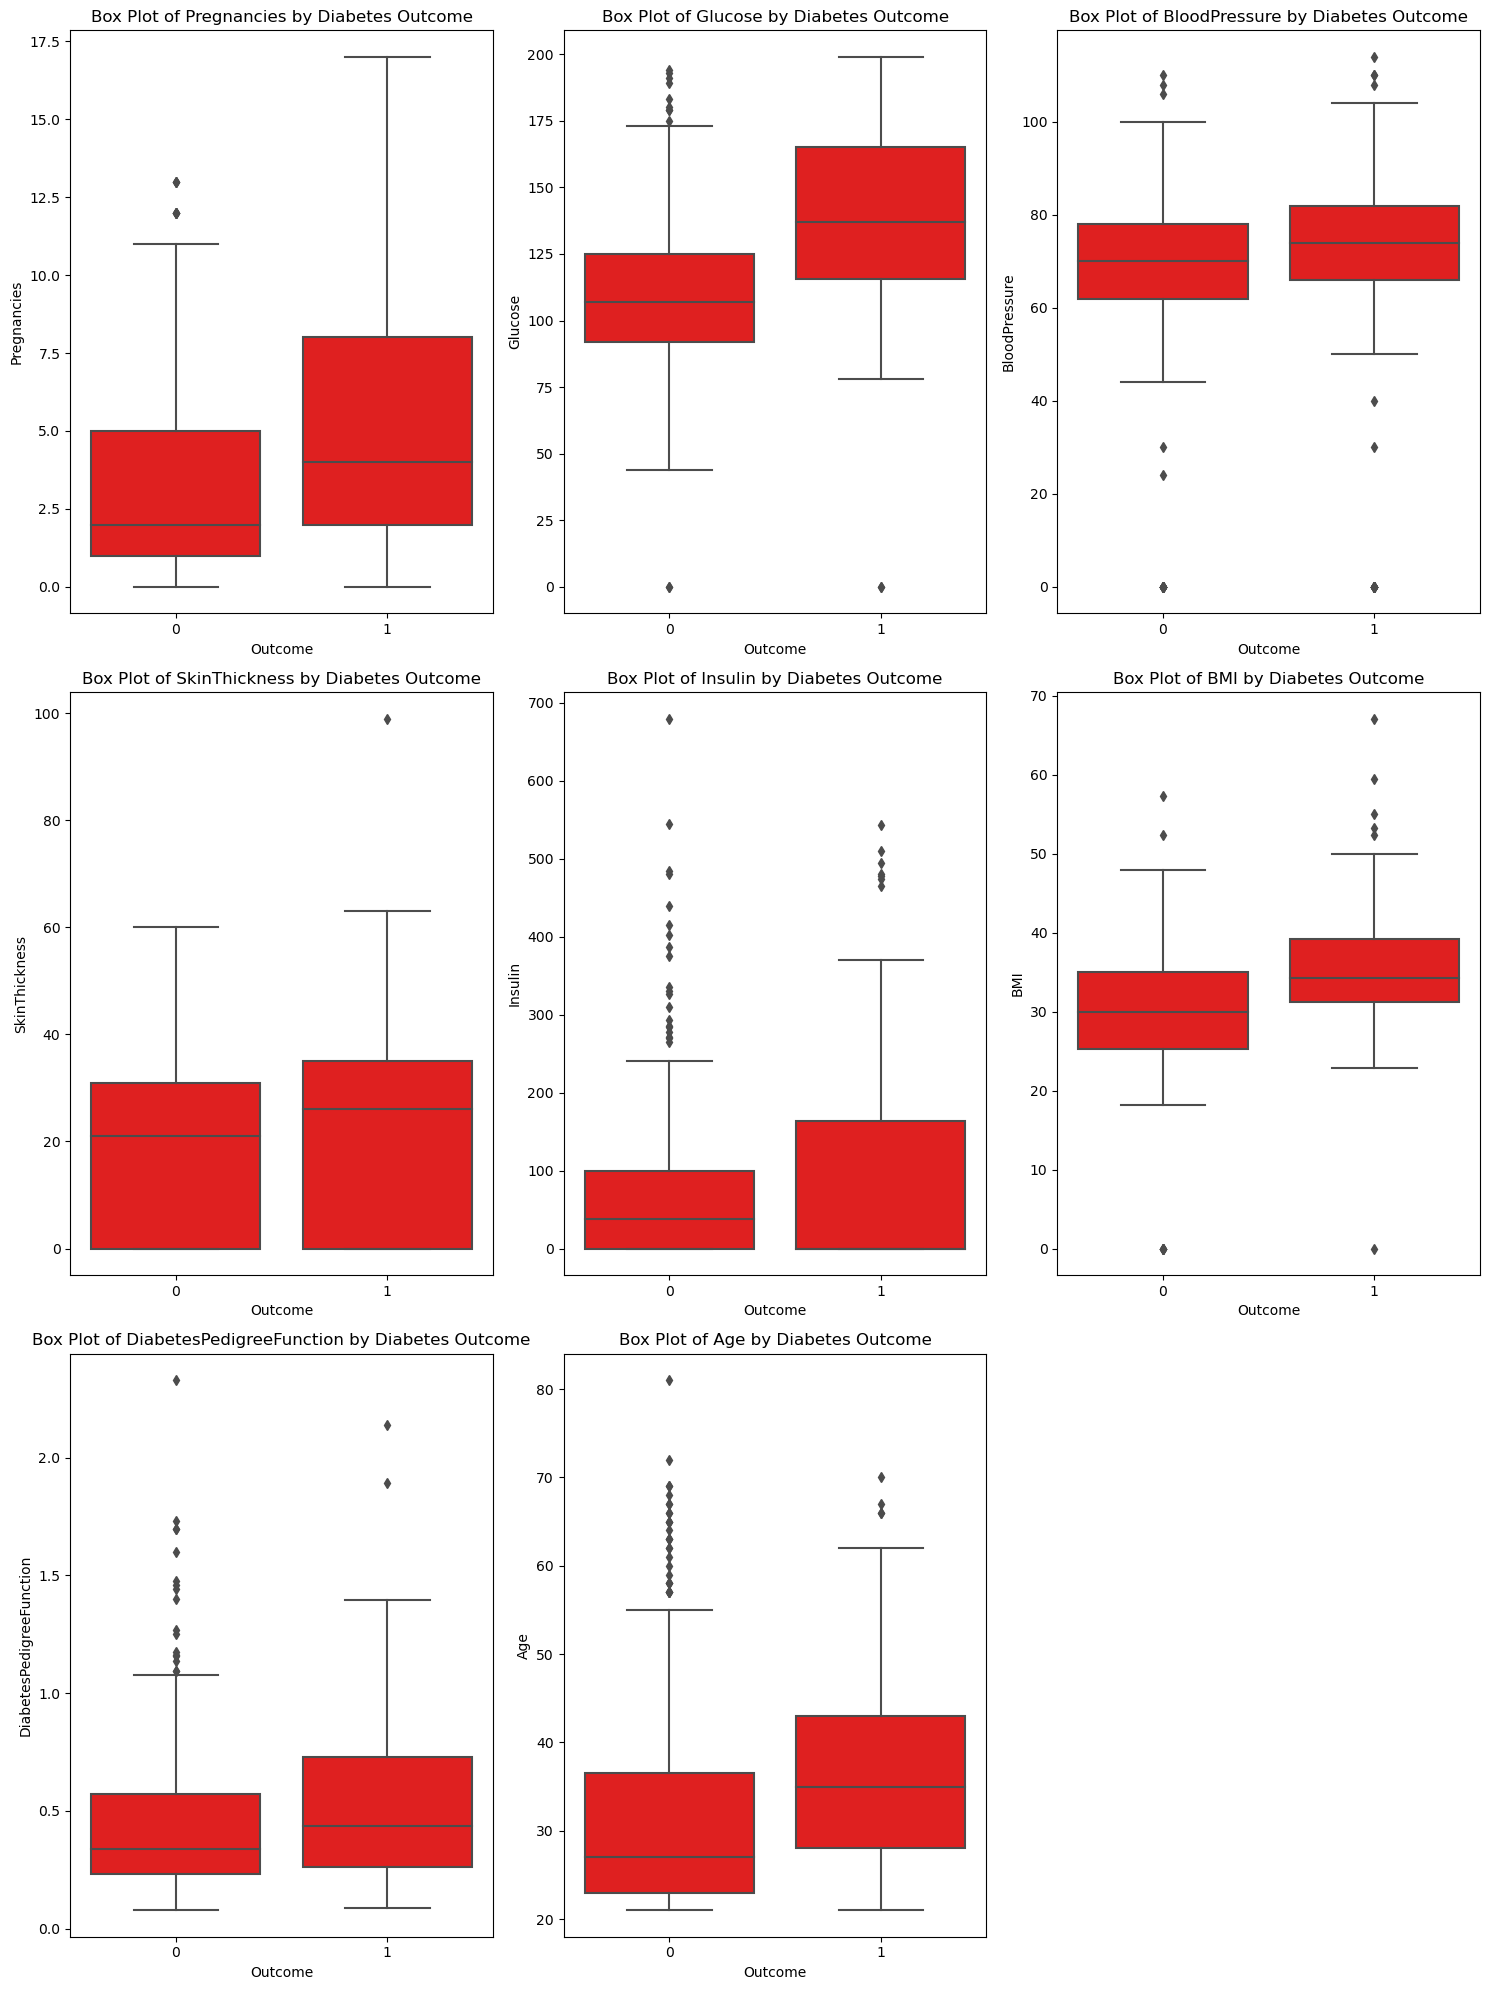

In [11]:
def plot_boxplots(data):
    plt.figure(figsize=(15, 20))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='Outcome', y=column, data=data, color='red')  # Mengubah warna menjadi merah
        plt.title(f'Box Plot of {column} by Diabetes Outcome')
    plt.tight_layout()  # Panggil fungsi untuk memperbaiki layout
    plt.show()

# Pastikan df adalah DataFrame Anda yang sudah ada
plot_boxplots(df)

<Axes: >

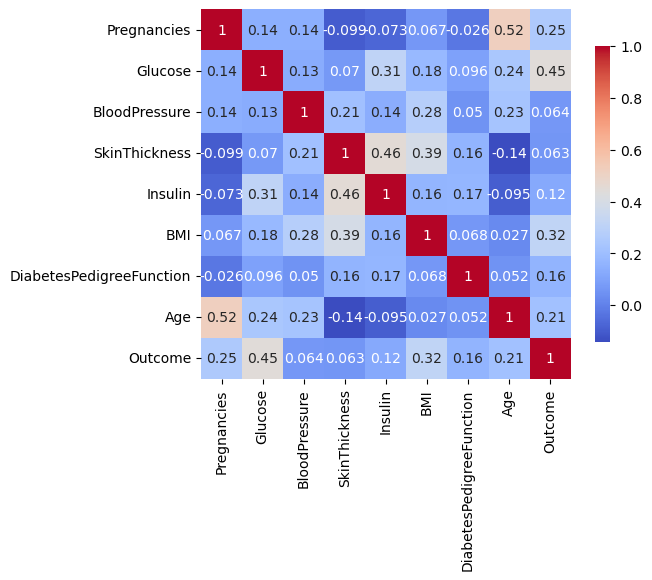

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', 
            square=True, cbar_kws={'shrink': .8})

In [13]:
df_text = pd.read_excel('foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


In [14]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductID          5000 non-null   object
 1   Helpfulness_Score  5000 non-null   int64 
 2   Rating             5000 non-null   int64 
 3   Review_Title       5000 non-null   object
 4   Text               5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


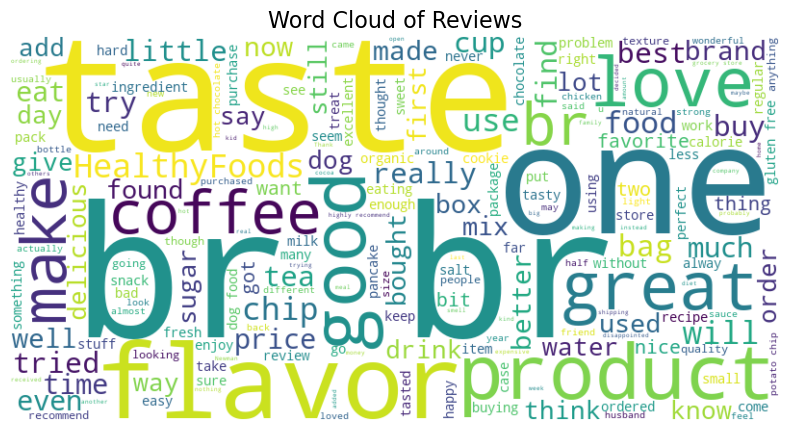

In [15]:
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Reviews", fontsize=16)
    plt.show()

plot_wordcloud(text)

### Preprocessing

In [18]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [19]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
x = df.drop('Outcome', axis=1)
y = df["Outcome"]

In [21]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

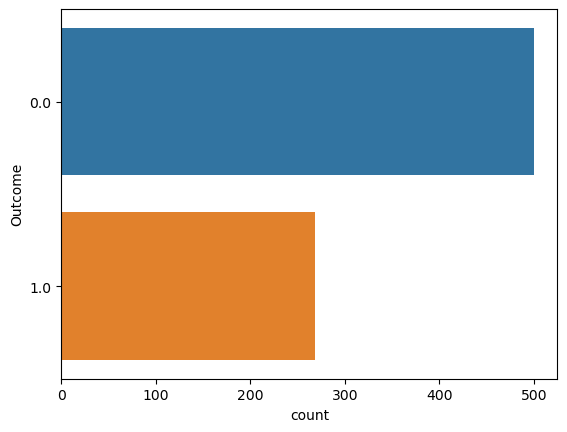

In [22]:
sns.countplot(data=df, y=y)

<Axes: ylabel='count'>

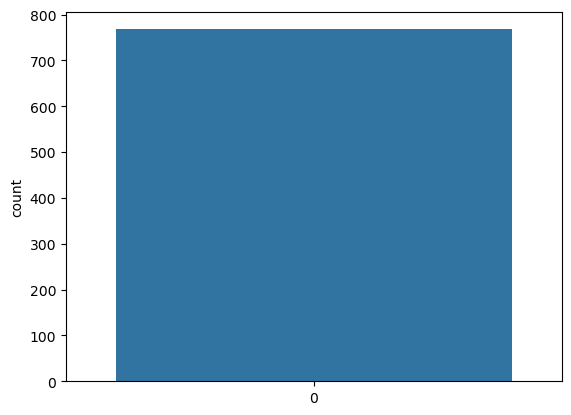

In [23]:
sns.countplot(y)

<Axes: ylabel='count'>

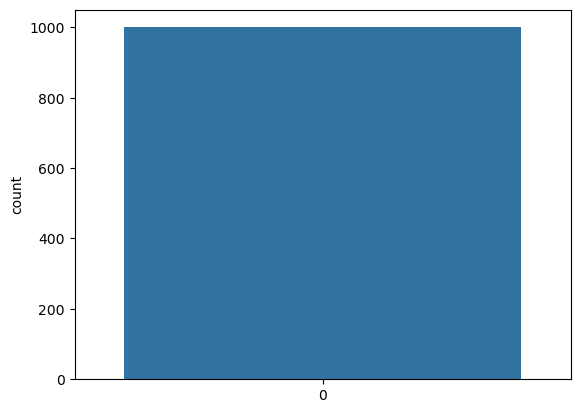

In [24]:
sns.countplot(y_resampled)

<Axes: xlabel='count', ylabel='Outcome'>

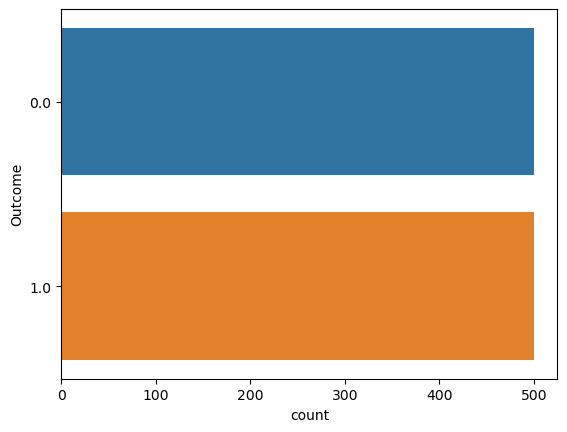

In [25]:
sns.countplot(data=x_resampled, y=y_resampled)

In [27]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631558,1.341591,0.161680,0.909160,-0.762150,0.145372,0.509348,0.239937
1,-0.960924,-1.343540,-0.162144,0.525073,-0.762150,0.293760,-0.424792,-0.249485
2,1.268551,1.937542,-0.270085,-1.331350,-0.762150,-1.374123,0.661654,-0.151600
3,-0.960924,-1.209618,-0.162144,0.140986,0.158329,-0.661860,-1.047552,-1.228329
4,-1.279421,0.759031,-1.565378,0.909160,0.882961,1.563963,0.105908,-0.053716
